Visualization of Schools and Hospitals in a Map and Creating Charts:<br>

 The following libraries are used to visualize the distribution of schools and hospitals :

--->geopandas to load a GeoJSON dataset.<br>
--->folium to create an interactive map.<br>
--->matplotlib for creating bar and pie charts.<br>
--->pandas for data manipulation.<br>

Loading the Datasets:<br>
First,we need to load the datasets containing information about schools and hospitals.<br>
           
           file_path1 = 'school.geojson'
           
           file_path2 = 'hospital.geojson'

Creating an Interactive Map:<br>
We need to create a map to count the number of hospitals and school around Vienna using the folium library and initialize variables.<br>
        
Adding Markers to the Map We iterate through the GeoDataFrame, categorizing places as schools, hospitals, or others. For schools and hospitals, we add markers to the map with Font Awesome icons representing their types.<br>
For Schools:

         icon=folium.Icon(color='blue', icon='tint', prefix='fa')

For Hospitals:

        icon=folium.Icon(color='red', icon='tint', prefix='fa')





In [5]:
!pip install geopandas
!pip install folium

import geopandas as gpd
import folium

# Load the GeoJSON or shapefile data
file_path1 = 'school.geojson'  # Give the actual path to your GeoJSON or shapefile
gdf1 = gpd.read_file(file_path1)

file_path2 = 'hospital.geojson'  # Give the actual path to your GeoJSON or shapefile
gdf2 = gpd.read_file(file_path2)

# Create a Folium map centered at the mean of all geometries
map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]
map_school_blue = folium.Map(location=map_center, zoom_start=10)

# Plot the first GeoDataFrame
for _, feature in gdf1.iterrows():#This line is initiating a loop to iterate over the rows of the GeoDataFrame gdf1.
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x  #The iterrows() method is used to iterate over DataFrame rows as (index, Series) pairs.
    name = feature['name'] if 'name' in feature else 'Area'
    school_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='blue', icon='tint', prefix='fa')
    )
    school_marker.add_to(map_school_blue)

# Plot the second GeoDataFrame
for _, feature in gdf2.iterrows():
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    name = feature['name'] if 'name' in feature else 'Area'
    blue_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='red', icon='tint', prefix='fa')  # 'school' is the blue symbol
    )
    blue_marker.add_to(map_school_blue)

# Display the map in the Colab notebook
map_school_blue

<ipython-input-5-54d70868b6a2>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]


Creating a Bar Chart:

      bars = plt.bar(df['Type'], df['Count'])
      plt.xlabel('Type')  
      plt.ylabel('Count')
      plt.title('Number of Schools and Hospitals')

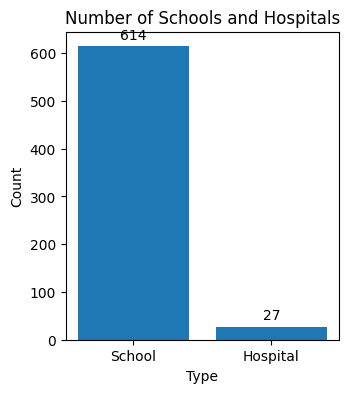

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load GeoJSON data into GeoDataFrames with geometry column explicitly specified
schools_geojson = 'school.geojson'
hospitals_geojson = 'hospital.geojson'

# Read GeoJSON files and set the geometry column
schools_gdf = gpd.read_file(schools_geojson, geometry='geometry')
hospitals_gdf = gpd.read_file(hospitals_geojson, geometry='geometry')

# Count the number of schools and hospitals
schools_count = len(schools_gdf)
hospitals_count = len(hospitals_gdf)

# Create a bar chart with counts displayed
data = {'Type': ['School', 'Hospital'], 'Count': [schools_count, hospitals_count]}
df = pd.DataFrame(data)
plt.figure(figsize=(12, 4))

# Create a subplot for the bar chart
plt.subplot(131)  # Subplot with 1 row, 3 columns, and index 1
bars = plt.bar(df['Type'], df['Count'])  # Create a bar chart with school and hospital counts
plt.xlabel('Type')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Number of Schools and Hospitals')  # Title of the bar chart

# Annotate the bars with counts
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')
    # This loop annotates each bar in the bar chart with its count above the bar.



Creating a Pie Chart:

         plt.pie(df['Count'], labels=df['Type'], autopct='%1.1f%%', startangle=90)

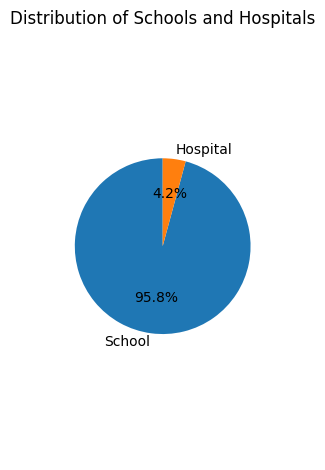

In [ ]:
# Create a pie chart
plt.subplot(132)  # Subplot with 1 row, 3 columns, and index 2
plt.pie(df['Count'], labels=df['Type'], autopct='%1.1f%%', startangle=90)
# Create a pie chart with school and hospital counts, displaying percentages and starting angle at 90 degrees
plt.axis('equal')  # Make the pie chart circular
plt.title('Distribution of Schools and Hospitals')  # Title of the pie chart

# Display the plots
plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()  # Display the bar and pie charts
